<a href="https://colab.research.google.com/github/talib18245/canteen/blob/master/Sentimental_Analysis_Empath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from nltk.corpus import stopwords
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
import re

In [4]:
tweet_path = '/content/drive/MyDrive/CN_lec/tweets.csv'
user_path = '/content/drive/MyDrive/CN_lec/users.csv'

tweet_data = pd.read_csv(tweet_path)
user_data = pd.read_csv(user_path)

In [5]:
tweet_data.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ShashiRajbhar6/status/1376...,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,1.376739e+18,1.015970e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
1,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
2,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
3,https://twitter.com/SukhdevSingh_/status/13767...,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1.376739e+18,1.308357e+18,0,1,3,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
4,https://twitter.com/Davidmu66668113/status/137...,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the...",1.376739e+18,1.357312e+18,0,0,1,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN


In [6]:
user_data.head()

,username,displayname,userId,rawDescription,descriptionUrls,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl,profileImageUrl,profileBannerUrl,profileUrl
0,ShashiRajbhar6,Shashi Rajbhar,1.020000e+18,Satya presan 🤔ho Sakta but prajit💪 nhi\njhuth ...,[],False,2018-07-08T14:44:03+00:00,1788,1576,14396,26071,1,254,"Azm Uttar Pradesh, India",False,NaN,https://pbs.twimg.com/profile_images/135433129...,https://pbs.twimg.com/profile_banners/10159697...,https://twitter.com/ShashiRajbhar6
1,kaursuk06272818,KAUR SUKH🌾ਕੌਰ ਸੁਖ,1.330000e+18,ਜਿਓਣਾ ਕੀ ਸਰੀਰਾਂ ਦਾ ਜੇਕਰ ਹੋਣ ਜ਼ਮੀਰਾਂ ਮਰੀਆਂ 🌼,[],False,2020-11-29T06:40:06+00:00,51,68,1338,3676,0,607,NaN,False,NaN,https://pbs.twimg.com/profile_images/133295149...,https://pbs.twimg.com/profile_banners/13329372...,https://twitter.com/kaursuk06272818
2,SukhdevSingh_,Sukhdev Singh,1.310000e+18,Just a part of my society . Social and Politic...,[],False,2020-09-22T10:45:27+00:00,2595,3314,3281,3533,0,519,"Punjab, India",False,NaN,https://pbs.twimg.com/profile_images/130835702...,https://pbs.twimg.com/profile_banners/13083566...,https://twitter.com/SukhdevSingh_
3,Davidmu66668113,tera jija 🤨🚩🇺🇸,1.360000e+18,dream boy 🌪🌍🔥💯,[],False,2021-02-04T12:55:36+00:00,18,286,347,520,0,3,NaN,False,NaN,https://pbs.twimg.com/profile_images/137600703...,https://pbs.twimg.com/profile_banners/13573117...,https://twitter.com/Davidmu66668113
4,Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,2.918611e+09,Seeker...,[],False,2014-12-04T13:29:54+00:00,173,41,8954,16364,19,112,"Jaipur,Rajasthan,India",False,NaN,https://pbs.twimg.com/profile_images/125684524...,https://pbs.twimg.com/profile_banners/29186109...,https://twitter.com/Abhimanyu_1987


In [7]:
final_data = pd.merge(tweet_data, user_data, how='inner', on='userId')

In [8]:
row_count = final_data.shape[0]
col_count = final_data.shape[1]

print("Number of rows in the data {}".format(row_count))
print("Number of columns in the data {}".format(col_count))

Number of rows in the data 1645384
Number of columns in the data 32


In [9]:
final_data.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers,username,displayname,rawDescription,descriptionUrls,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl,profileImageUrl,profileBannerUrl,profileUrl
0,https://twitter.com/Abhimanyu_1987/status/1376...,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,1.376738e+18,2.918611e+09,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,{'url': 'https://twitter.com/IndiaToday/status...,NaN,Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,[],False,2014-12-04T13:29:54+00:00,173,41,8954,16364,19,112,"Jaipur,Rajasthan,India",False,NaN,https://pbs.twimg.com/profile_images/125684524...,https://pbs.twimg.com/profile_banners/29186109...,https://twitter.com/Abhimanyu_1987
1,https://twitter.com/Abhimanyu_1987/status/1376...,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,1.376738e+18,2.918611e+09,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,{'url': 'https://twitter.com/IndiaToday/status...,NaN,Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,NaN,False,2014-12-04T13:29:54+00:00,177,52,9217,17217,19,114,"Jaipur,Rajasthan,India",False,NaN,https://pbs.twimg.com/profile_images/125684524...,https://pbs.twimg.com/profile_banners/29186109...,https://twitter.com/Abhimanyu_1987
2,https://twitter.com/Abhimanyu_1987/status/1397...,2021-05-26 10:12:29+00:00,#FarmersProtests are super spreaders. Probably...,1.397496e+18,2.918611e+09,0,1,1,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,[],False,2014-12-04T13:29:54+00:00,173,41,8954,16364,19,112,"Jaipur,Rajasthan,India",False,NaN,https://pbs.twimg.com/profile_images/125684524...,https://pbs.twimg.com/profile_banners/29186109...,https://twitter.com/Abhimanyu_1987
3,https://twitter.com/Abhimanyu_1987/status/1397...,2021-05-26 10:12:29+00:00,#FarmersProtests are super spreaders. Probably...,1.397496e+18,2.918611e+09,0,1,1,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,NaN,False,2014-12-04T13:29:54+00:00,177,52,9217,17217,19,114,"Jaipur,Rajasthan,India",False,NaN,https://pbs.twimg.com/profile_images/125684524...,https://pbs.twimg.com/profile_banners/29186109...,https://twitter.com/Abhimanyu_1987
4,https://twitter.com/Abhimanyu_1987/status/1397...,2021-05-26 04:05:51+00:00,"Yes, they are supreme spreader. #FarmersProtes...",1.397404e+18,2.918611e+09,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,[],False,2014-12-04T13:29:54+00:00,173,41,8954,16364,19,112,"Jaipur,Rajasthan,India",False,NaN,https://pbs.twimg.com/profile_images/125684524...,https://pbs.twimg.com/profile_banners/29186109...,https://twitter.com/Abhimanyu_1987


In [10]:
def perc_null(data):
    row_count = data.shape[0]
    columns_to_drop = []
    for col in data.columns:
        null_count = data[col].isnull().sum()
        if null_count > 0:
            perc_null = float(null_count)*100/row_count
            print("NaN values in the {} column is {:.2f} %".format(col, perc_null))
            if perc_null > 40:
                columns_to_drop.append(col)
    return columns_to_drop
columns_to_drop = perc_null(final_data)

NaN values in the source column is 0.04 %
NaN values in the media column is 78.64 %
NaN values in the retweetedTweet column is 100.00 %
NaN values in the quotedTweet column is 75.83 %
NaN values in the mentionedUsers column is 48.55 %
NaN values in the displayname column is 0.02 %
NaN values in the rawDescription column is 17.79 %
NaN values in the descriptionUrls column is 38.34 %
NaN values in the location column is 33.75 %
NaN values in the linkUrl column is 76.02 %
NaN values in the profileImageUrl column is 0.02 %
NaN values in the profileBannerUrl column is 27.08 %


In [11]:
final_data.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
initial_row_count = final_data.shape[0]
final_row_count = final_data.dropna(axis=0).shape[0]

perc_data_loss = float((initial_row_count-final_row_count)/initial_row_count)*100
print("Percentage loss of data after dropping the NaN rows {:.3f}%".format(perc_data_loss))

Percentage loss of data after dropping the NaN rows 69.484%


In [13]:
perc_null(final_data)

NaN values in the source column is 0.04 %
NaN values in the displayname column is 0.02 %
NaN values in the rawDescription column is 17.79 %
NaN values in the descriptionUrls column is 38.34 %
NaN values in the location column is 33.75 %
NaN values in the profileImageUrl column is 0.02 %
NaN values in the profileBannerUrl column is 27.08 %


[]

In [14]:
final_data.drop(['descriptionUrls', 'profileImageUrl', 'profileBannerUrl'], axis=1, inplace=True)

In [15]:
final_data['location'] = final_data['location'].fillna('Unknown')
final_data['rawDescription'] = final_data['rawDescription'].fillna('No Description')

In [16]:
perc_null(final_data)

NaN values in the source column is 0.04 %
NaN values in the displayname column is 0.02 %


[]

In [17]:
initial_row_count = final_data.shape[0]
final_row_count = final_data.dropna(axis=0).shape[0]

perc_data_loss = float((initial_row_count-final_row_count)/initial_row_count)*100
print("Percentage loss of data after dropping the NaN rows {:.3f}%".format(perc_data_loss))

Percentage loss of data after dropping the NaN rows 0.058%


In [18]:
final_data.dropna(axis=0, inplace=True)

In [19]:
final_data.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,username,displayname,rawDescription,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,profileUrl
0,https://twitter.com/Abhimanyu_1987/status/1376...,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,1.376738e+18,2.918611e+09,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,False,2014-12-04T13:29:54+00:00,173,41,8954,16364,19,112,"Jaipur,Rajasthan,India",False,https://twitter.com/Abhimanyu_1987
1,https://twitter.com/Abhimanyu_1987/status/1376...,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,1.376738e+18,2.918611e+09,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,False,2014-12-04T13:29:54+00:00,177,52,9217,17217,19,114,"Jaipur,Rajasthan,India",False,https://twitter.com/Abhimanyu_1987
2,https://twitter.com/Abhimanyu_1987/status/1397...,2021-05-26 10:12:29+00:00,#FarmersProtests are super spreaders. Probably...,1.397496e+18,2.918611e+09,0,1,1,0,"<a href=""http://twitter.com/download/android"" ...",Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,False,2014-12-04T13:29:54+00:00,173,41,8954,16364,19,112,"Jaipur,Rajasthan,India",False,https://twitter.com/Abhimanyu_1987
3,https://twitter.com/Abhimanyu_1987/status/1397...,2021-05-26 10:12:29+00:00,#FarmersProtests are super spreaders. Probably...,1.397496e+18,2.918611e+09,0,1,1,0,"<a href=""http://twitter.com/download/android"" ...",Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,False,2014-12-04T13:29:54+00:00,177,52,9217,17217,19,114,"Jaipur,Rajasthan,India",False,https://twitter.com/Abhimanyu_1987
4,https://twitter.com/Abhimanyu_1987/status/1397...,2021-05-26 04:05:51+00:00,"Yes, they are supreme spreader. #FarmersProtes...",1.397404e+18,2.918611e+09,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,Seeker...,False,2014-12-04T13:29:54+00:00,173,41,8954,16364,19,112,"Jaipur,Rajasthan,India",False,https://twitter.com/Abhimanyu_1987


In [20]:
final_data['date'] = pd.to_datetime(final_data['date'])

final_data.sort_values(by='date', inplace=True)

In [21]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644426 entries, 816606 to 1640008
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   tweetUrl         1644426 non-null  object             
 1   date             1644426 non-null  datetime64[ns, UTC]
 2   renderedContent  1644426 non-null  object             
 3   tweetId          1644426 non-null  float64            
 4   userId           1644426 non-null  float64            
 5   replyCount       1644426 non-null  int64              
 6   retweetCount     1644426 non-null  int64              
 7   likeCount        1644426 non-null  int64              
 8   quoteCount       1644426 non-null  int64              
 9   source           1644426 non-null  object             
 10  username         1644426 non-null  object             
 11  displayname      1644426 non-null  object             
 12  rawDescription   1644426 non-null  ob

In [22]:
final_data['datetime'] = final_data['date']
final_data['date'] = final_data['datetime'].dt.date

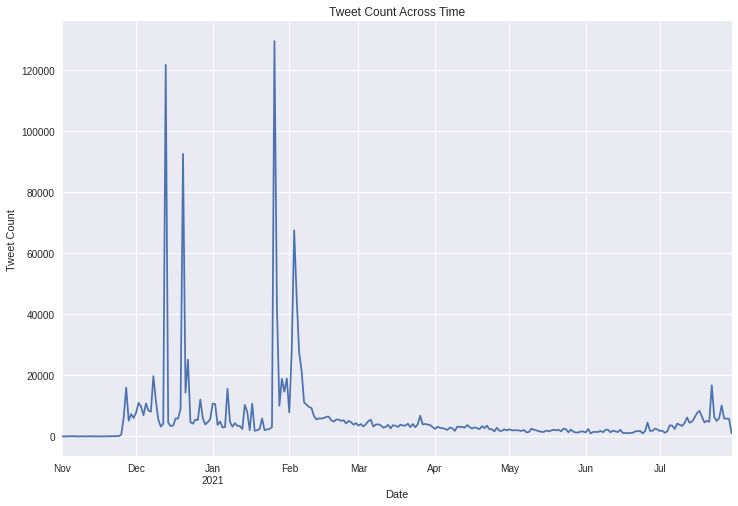

In [23]:
final_data['date']  = pd.to_datetime(final_data['date'])
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
final_data.groupby('date').count()['tweetId'].plot()
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Tweet Count Across Time")
plt.show()

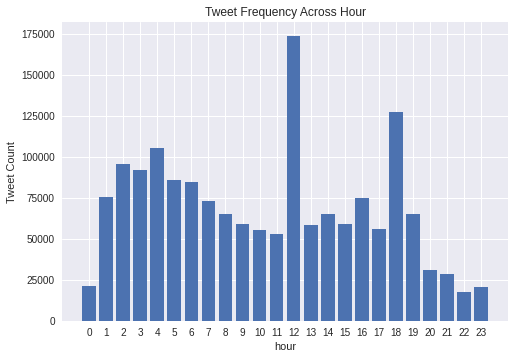

In [24]:
final_data['time'] = final_data['datetime'].dt.time
final_data['hour'] = final_data['datetime'].dt.hour

hour = final_data.groupby('hour').count()['tweetId'].index
tweet_count = final_data.groupby('hour').count()['tweetId'].values

plt.bar(x=hour, height=tweet_count)
plt.xticks(ticks=hour)
plt.xlabel('hour')
plt.ylabel('Tweet Count')
plt.title("Tweet Frequency Across Hour")
plt.show()

In [25]:
top_10_user_ids = final_data.groupby('userId').count()[['username', 'displayname']].sort_values(by='username', ascending = False).iloc[ : 10].index

top_10_tweeter_data = final_data[final_data['userId'].isin(top_10_user_ids)]

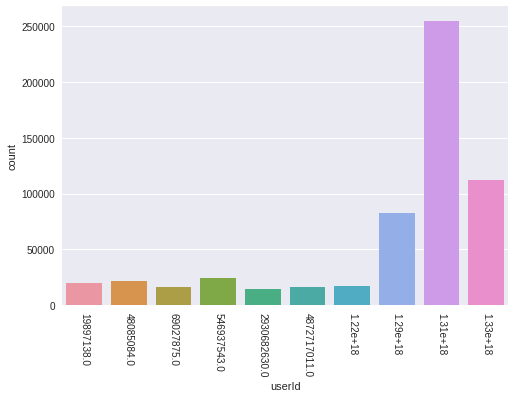

In [85]:
sns.countplot(data=top_10_tweeter_data, x='userId')
plt.xticks(rotation=990)
plt.show()

In [27]:
final_data.sort_values(by='likeCount', ascending = False).iloc[ : 20][['date', 'renderedContent', 'username', 'displayname']]

,date,renderedContent,username,displayname
1025186,2021-02-02,why aren’t we talking about this?! #FarmersPro...,rihanna,Rihanna
1012378,2021-02-03,"“Paid actors,” huh? Quite the casting director...",miakhalifa,Mia K.
1012379,2021-02-03,What in the human rights violations is going o...,miakhalifa,Mia K.
900672,2021-02-09,To all of my influencer/celeb friends- read up...,AmandaCerny,Amanda Cerny
986161,2021-02-04,Raise your voice for the farmers! #farmersprot...,amirkingkhan,Amir Khan
986162,2021-02-04,Raise your voice for the farmers! #farmersprot...,amirkingkhan,Amir Khan
794424,2021-02-05,Standing in solidarity with the #FarmersProtes...,SusanSarandon,Susan Sarandon
850717,2021-02-03,Rihanna doesn't know.\nGreta doesn't know.\nTr...,tanejamainhoon,Nikhil Taneja
850716,2021-02-03,Rihanna doesn't know.\nGreta doesn't know.\nTr...,tanejamainhoon,Nikhil Taneja
942647,2021-02-05,There has been much social media coverage arou...,BobBlackman,Bob Blackman


In [81]:
keys = main.keys()
values = main.values()
plt.figure(figsize=(200,82))
plt.rcParams.update({'font.size': 22})
bars = plt.bar(keys, height=values, width=.4)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.bar(keys, values)

<BarContainer object of 100 artists>

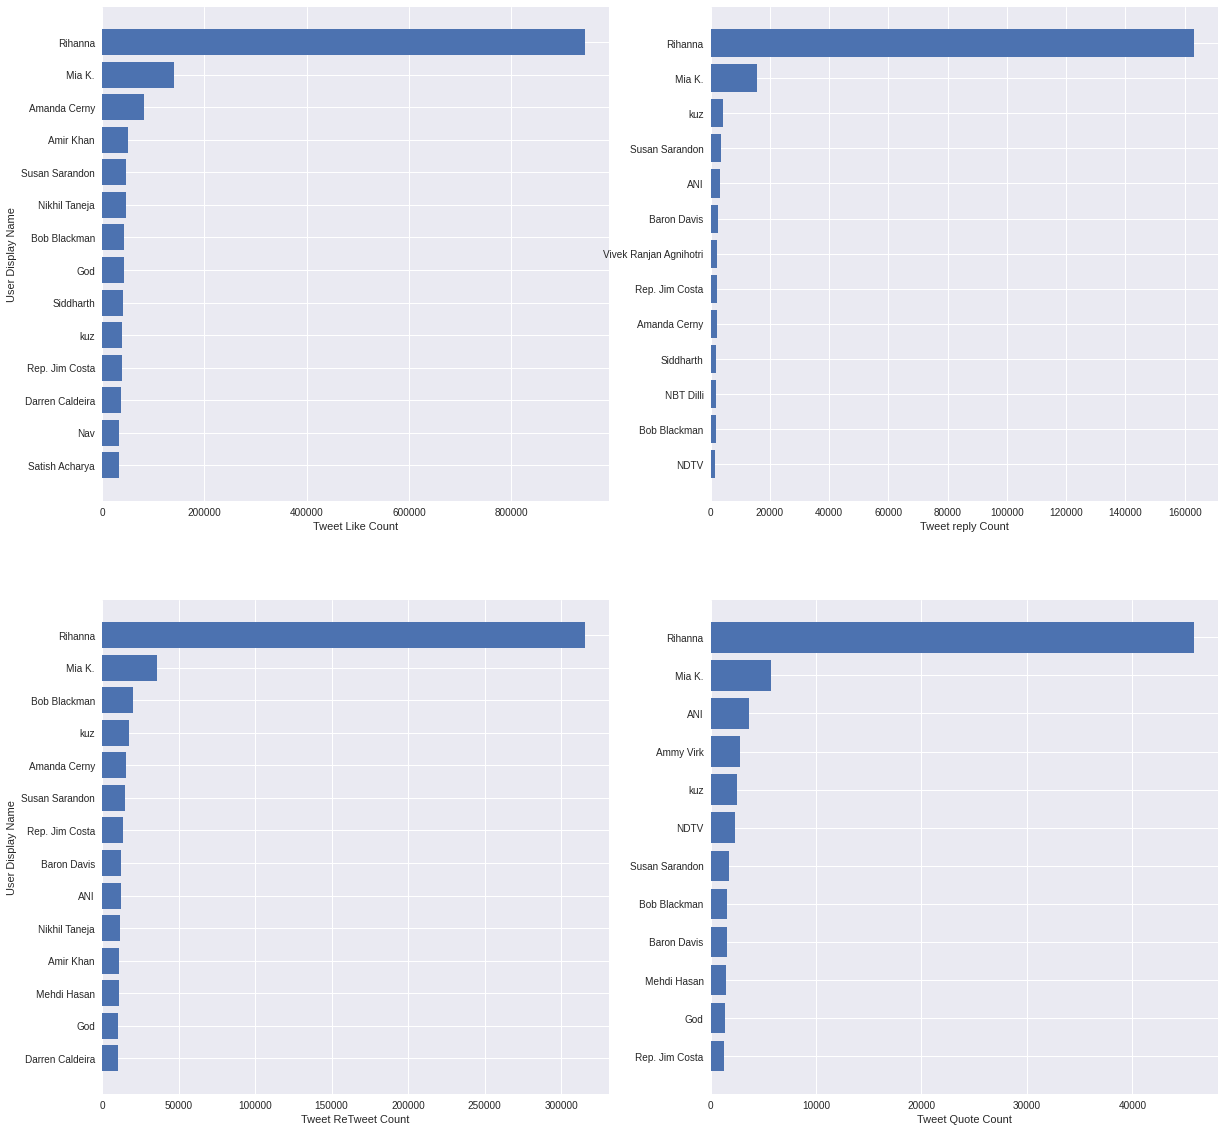

In [87]:
figure, (ax1, ax2) = plt.subplots(2, 2, figsize=(20, 20))

# plot top 20 most liked tweets
data1 = final_data.sort_values(by='likeCount', ascending = False).iloc[ : 20][['date', 'renderedContent', 'username', 'displayname', 'likeCount']].sort_values(by='likeCount', ascending=True)
ax1[0].barh(y=data1['displayname'], width = data1['likeCount'])
ax1[0].set_xlabel("Tweet Like Count")
ax1[0].set_ylabel("User Display Name")

# plot top 20 most Replied tweets
data1 = final_data.sort_values(by='replyCount', ascending = False).iloc[ : 20][['date', 'renderedContent', 'username', 'displayname', 'replyCount']].sort_values(by='replyCount', ascending=True)
ax1[1].barh(y=data1['displayname'], width = data1['replyCount'])
ax1[1].set_xlabel("Tweet reply Count")


# plot top 20 most retweeted tweets
data1 = final_data.sort_values(by='retweetCount', ascending = False).iloc[ : 20][['date', 'renderedContent', 'username', 'displayname', 'retweetCount']].sort_values(by='retweetCount', ascending=True)
ax2[0].barh(y=data1['displayname'], width = data1['retweetCount'])
ax2[0].set_xlabel("Tweet ReTweet Count")
ax2[0].set_ylabel("User Display Name")

# plot top 20 most quoted tweets
data1 = final_data.sort_values(by='quoteCount', ascending = False).iloc[ : 20][['date', 'renderedContent', 'username', 'displayname', 'quoteCount']].sort_values(by='quoteCount', ascending=True)
ax2[1].barh(y=data1['displayname'], width = data1['quoteCount'])
ax2[1].set_xlabel("Tweet Quote Count")

figure.show()

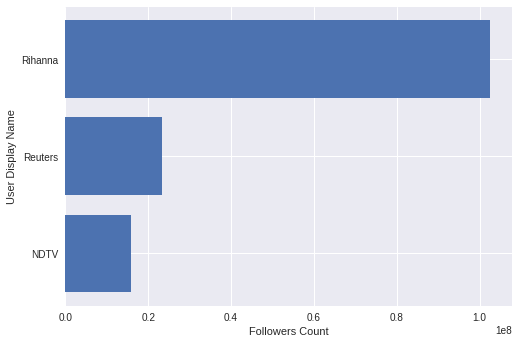

In [29]:

data1 = final_data.sort_values(by='followersCount', ascending = False).iloc[ : 20][['date', 'renderedContent', 'username', 'displayname', 'followersCount']].sort_values(by='followersCount', ascending=True)
plt.barh(y=data1['displayname'], width = data1['followersCount'])
plt.xlabel("Followers Count")
plt.ylabel("User Display Name")
plt.show()

In [88]:
def preprocess_source(x):
    p = re.compile(r'<.*?>')
    return p.sub('', x)

final_data['source_app'] = final_data['source'].apply(lambda x : preprocess_source(x))
cc=100

In [31]:
# Store labels
source_labels = final_data['source_app'].value_counts().index
top_5_sources = list(final_data['source_app'].value_counts().head(5).index)

def preprocess_source_app(x):
    
    if x not in top_5_sources:
        x = 'Others'
    return x

final_data['source_app'] = final_data['source_app'].apply(lambda x : preprocess_source_app(x))

In [32]:
top_5_sources.append('Others')

In [54]:
ds_data = user_data['rawDescription']
print(ds_data)

0         Satya presan 🤔ho Sakta but prajit💪 nhi\njhuth ...
1               ਜਿਓਣਾ ਕੀ ਸਰੀਰਾਂ ਦਾ ਜੇਕਰ ਹੋਣ ਜ਼ਮੀਰਾਂ ਮਰੀਆਂ 🌼
2         Just a part of my society . Social and Politic...
3                                            dream boy 🌪🌍🔥💯
4                                                 Seeker...
                                ...                        
201565    IELTS-PTE-SpokenEnglish Trainer\nWe R Knowledg...
201566    Senior Tech Reporter with @TechWireAsia & @Tec...
201567    Former candidate for NY City Council District ...
201568     instagram-@officialsonu05\nfacebook-@sonuvarjwat
201569                                                  NaN
Name: rawDescription, Length: 201570, dtype: object


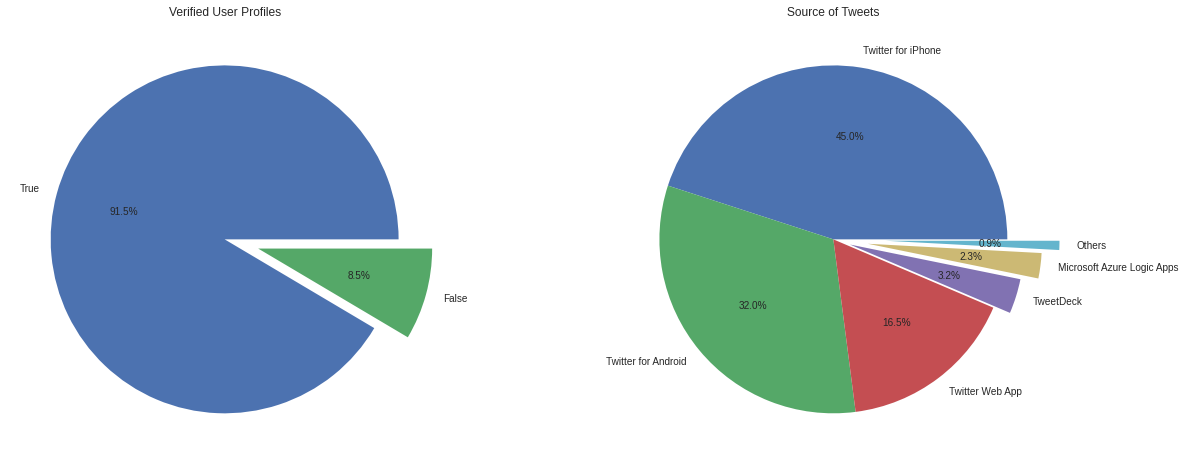

In [33]:
figure, ax = plt.subplots(1, 2, figsize=(20, 8))

# Verified vs non verified tweets
ax[0].pie(final_data['verified'].value_counts(), labels=['True', 'False'], autopct='%1.1f%%', explode = (0, 0.2))
ax[0].set_title("Verified User Profiles")

# Source of tweets
ax[1].pie(final_data['source_app'].value_counts(), labels= top_5_sources, autopct='%1.1f%%', explode = (0, 0, 0, 0.1, 0.2, 0.3))
ax[1].set_title("Source of Tweets")

figure.show()

In [34]:
pd.set_option('display.max_columns', None)
final_data.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,username,displayname,rawDescription,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,profileUrl,datetime,time,hour,source_app
816606,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday in a public meeting @TelanganaCMO al...,1.322740e+18,74388898.0,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge for @INCTelangana✋Permanent Invi...,True,2009-09-15T07:07:52+00:00,38803,1179,37009,15874,72,3365,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone
816605,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday in a public meeting @TelanganaCMO al...,1.322740e+18,74388898.0,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge for @INCTelangana✋Permanent Invi...,True,2009-09-15T07:07:52+00:00,38803,1179,37009,15874,72,3365,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone
816604,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday in a public meeting @TelanganaCMO al...,1.322740e+18,74388898.0,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge for @INCTelangana✋Permanent Invi...,True,2009-09-15T07:07:52+00:00,32548,1133,34253,14215,68,3031,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone
816603,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday in a public meeting @TelanganaCMO al...,1.322740e+18,74388898.0,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge for @INCTelangana✋Permanent Invi...,True,2009-09-15T07:07:52+00:00,32409,1136,34062,14123,67,2991,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone
816607,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday in a public meeting @TelanganaCMO al...,1.322740e+18,74388898.0,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge for @INCTelangana✋Permanent Invi...,True,2009-09-15T07:07:52+00:00,38828,1179,37021,15875,72,3368,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone


In [89]:
main1 = lexicon.analyze(" exit ", normalize=True)
print(main1)
for i in range(cc):
  l = lexicon.analyze(final_data["renderedContent"][i], normalize=True)
  for j in l:
    main1[j] += l[j]
  print(l)
print(main1)
main = {k:v for k,v in main.items() if v != 0.0}

{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'money': 0.0, 'wedding': 0.0, 'domestic_work': 0.0, 'sleep': 0.0, 'medical_emergency': 0.0, 'cold': 0.0, 'hate': 0.0, 'cheerfulness': 0.0, 'aggression': 0.0, 'occupation': 0.0, 'envy': 0.0, 'anticipation': 0.0, 'family': 0.0, 'vacation': 0.0, 'crime': 0.0, 'attractive': 0.0, 'masculine': 0.0, 'prison': 0.0, 'health': 0.0, 'pride': 0.0, 'dispute': 0.0, 'nervousness': 0.0, 'government': 0.0, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.0, 'leisure': 0.0, 'suffering': 0.0, 'royalty': 0.0, 'wealthy': 0.0, 'tourism': 0.0, 'furniture': 0.0, 'school': 0.0, 'magic': 0.0, 'beach': 0.0, 'journalism': 0.0, 'morning': 0.0, 'banking': 0.0, 'social_media': 0.0, 'exercise': 0.0, 'night': 0.0, 'kill': 0.0, 'blue_collar_job': 0.0, 'art': 0.0, 'ridicule': 0.0, 'play': 0.0, 'computer': 0.0, 'college': 0.0, 'optimism': 0.0, 'stealing': 0.0, 'real_estate': 0.0, 'home': 0.0, 'divine': 0.0, 'sexual': 0.0, 'fear': 0.0, 'irritability': 0.0, 'superhero': 0.0, 'b

In [51]:
pip install empath

     |████████████████████████████████| 57 kB 3.0 MB/s 
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57821 sha256=d12c7bfaf2c2904a33b356bfa79da9c82cf06b6f4b66248bf8af86f1867f4385
  Stored in directory: /root/.cache/pip/wheels/2b/78/a8/37d4505eeae79807f4b5565a193f7cfcee892137ad37591029
Successfully built empath


In [52]:
from empath import Empath
lexicon = Empath()

In [62]:
final_data


,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,username,displayname,rawDescription,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,profileUrl,datetime,time,hour,source_app
816606,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday public meeting TelanganaCMO alleged ...,1.322740e+18,7.438890e+07,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge INCTelangana Permanent Invitee C...,True,2009-09-15T07:07:52+00:00,38803,1179,37009,15874,72,3365,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone
816605,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday public meeting TelanganaCMO alleged ...,1.322740e+18,7.438890e+07,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge INCTelangana Permanent Invitee C...,True,2009-09-15T07:07:52+00:00,38803,1179,37009,15874,72,3365,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone
816604,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday public meeting TelanganaCMO alleged ...,1.322740e+18,7.438890e+07,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge INCTelangana Permanent Invitee C...,True,2009-09-15T07:07:52+00:00,32548,1133,34253,14215,68,3031,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone
816603,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday public meeting TelanganaCMO alleged ...,1.322740e+18,7.438890e+07,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge INCTelangana Permanent Invitee C...,True,2009-09-15T07:07:52+00:00,32409,1136,34062,14123,67,2991,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone
816607,https://twitter.com/manickamtagore/status/1322...,2020-11-01,Yesterday public meeting TelanganaCMO alleged ...,1.322740e+18,7.438890e+07,8,95,389,5,"<a href=""http://twitter.com/download/iphone"" r...",manickamtagore,Manickam Tagore .B🇮🇳✋மாணிக்கம் தாகூர்.ப,AICC Incharge INCTelangana Permanent Invitee C...,True,2009-09-15T07:07:52+00:00,38828,1179,37021,15875,72,3368,Madurai -Virudhunagar-Sivakasi,False,https://twitter.com/manickamtagore,2020-11-01 03:36:57+00:00,03:36:57,3,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011681,https://twitter.com/Supriya23bh/status/1420974...,2021-07-30,Congress MP Mr DeependerSHooda gives notice Ra...,1.420974e+18,7.228379e+07,0,6,34,0,"<a href=""http://twitter.com/download/iphone"" r...",Supriya23bh,Supriya Bhardwaj,Journalist National Affairs Editor Tv9 Bharatv...,False,2009-09-07T13:46:15+00:00,114978,852,37045,22772,147,15642,New Delhi,False,https://twitter.com/Supriya23bh,2021-07-30 05:07:28+00:00,05:07:28,5,Twitter for iPhone
1011682,https://twitter.com/Supriya23bh/status/1420974...,2021-07-30,Congress MP Mr DeependerSHooda gives notice Ra...,1.420974e+18,7.228379e+07,0,6,34,0,"<a href=""http://twitter.com/download/iphone"" r...",Supriya23bh,Supriya Bhardwaj,Journalist National Affairs Editor Tv9 Bharatv...,False,2009-09-07T13:46:15+00:00,115025,852,37056,22775,147,15650,New Delhi,False,https://twitter.com/Supriya23bh,2021-07-30 05:07:28+00:00,05:07:28,5,Twitter for iPhone
1640006,https://twitter.com/jssahota1962/status/142097...,2021-07-30,Support Farmers Save Future FarmersProtest Zee...,1.420975e+18,2.905002e+09,0,0,0,0,"<a hre